## This script is solve the least square problem Image Denoising
## Use sparse matrix to save memory required to solve the least square problem
## Name : Jee-Hye Yang
## Student ID : 20145708
## GitHub address : https://github.com/geehyeS2/assignment11

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure
import numpy.linalg as lin

In [19]:
file_image	= 'cau-4.jpg'

im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
(row, col)  = im.shape

In [20]:
# defined x derivative funtion
def x_derivative(row, col):
    n = row * col
    result = np.zeros((n, n))
    for i in range(n):
        if i<n-col:
            result[i][i] = -1
            result[i][i+col] = 1
        else:
            result[i][i] = 1            
    return result

In [21]:
# defined y derivative funtion
def y_derivative(row, col):
    n = row * col
    result = np.zeros((n, n))
    for i in range(n):
        if i!=n-1:
            result[i][i+1] = 1
            result[i][i] = -1
        else:
            result[i][i] = 1
    return result

std : 0.2 , lambda :  0.03125 , error :  12.08543603693542


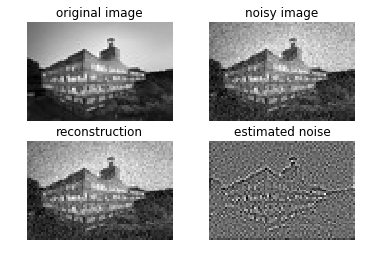

std : 0.2 , lambda :  0.0625 , error :  12.262645556678208


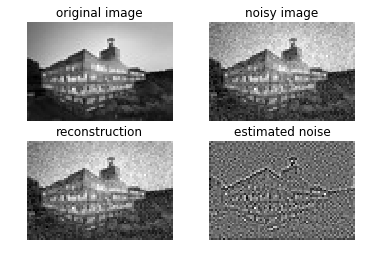

std : 0.2 , lambda :  0.125 , error :  11.691636076885422


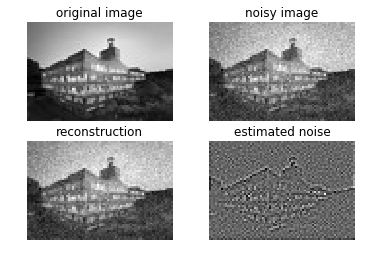

std : 0.2 , lambda :  0.25 , error :  10.43074769067588


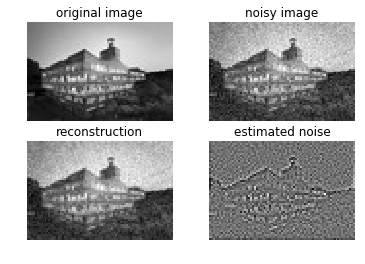

std : 0.2 , lambda :  0.5 , error :  9.959697236796975


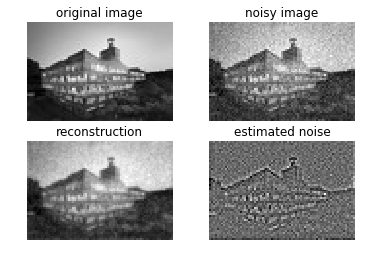

std : 0.2 , lambda :  1 , error :  14.78497596344285


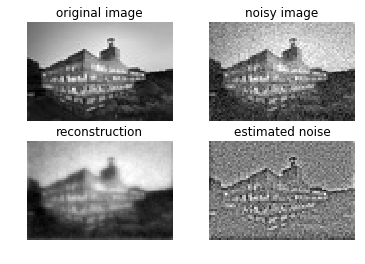

std : 0.2 , lambda :  2 , error :  21.969570396758467


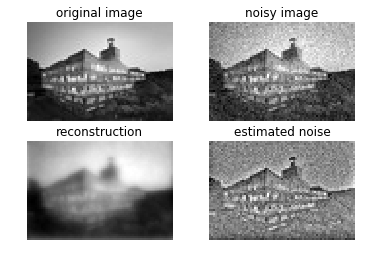

std : 0.2 , lambda :  4 , error :  30.12325681974567


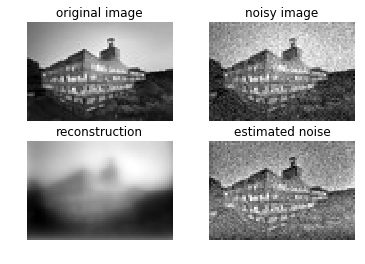

std : 0.2 , lambda :  8 , error :  39.514250767477634


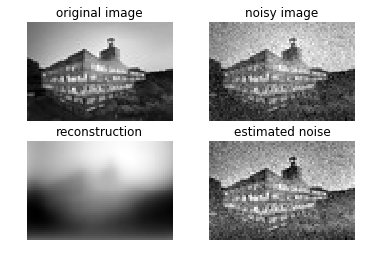

std : 0.2 , lambda :  16 , error :  49.597001705716764


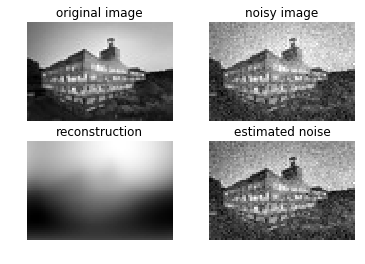

std : 0.4 , lambda :  0.03125 , error :  24.575271087571675


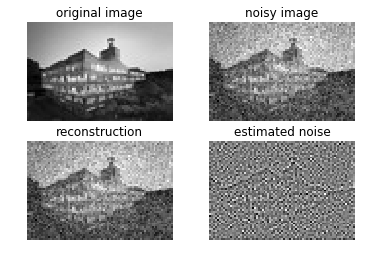

std : 0.4 , lambda :  0.0625 , error :  24.146459267333288


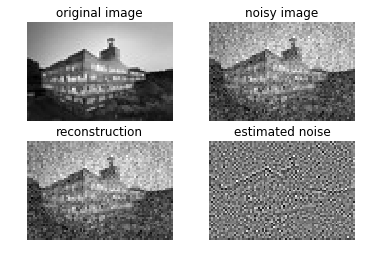

std : 0.4 , lambda :  0.125 , error :  23.153957747584585


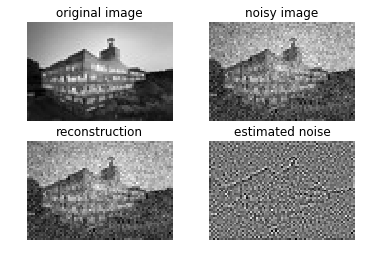

std : 0.4 , lambda :  0.25 , error :  20.090265783507075


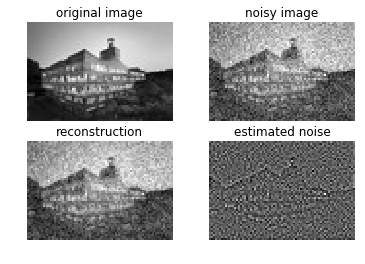

std : 0.4 , lambda :  0.5 , error :  15.0549011772371


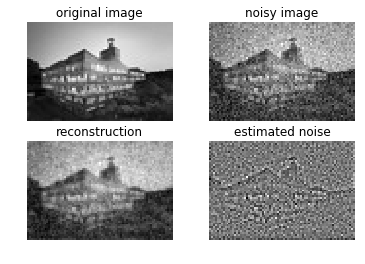

std : 0.4 , lambda :  1 , error :  16.271643527236684


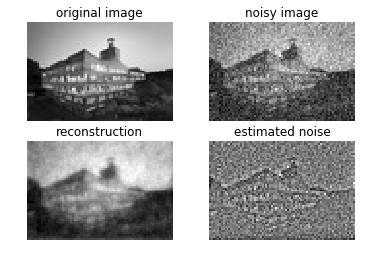

std : 0.4 , lambda :  2 , error :  22.20877294624266


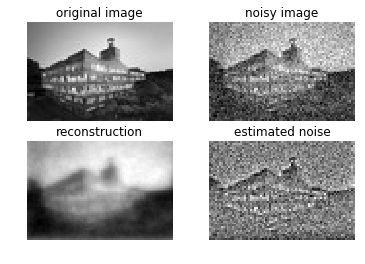

std : 0.4 , lambda :  4 , error :  30.114922327845118


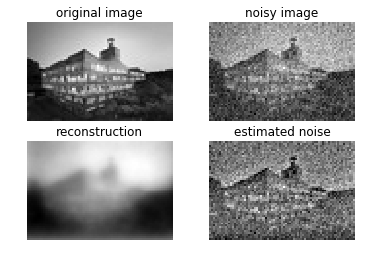

std : 0.4 , lambda :  8 , error :  39.77457096946806


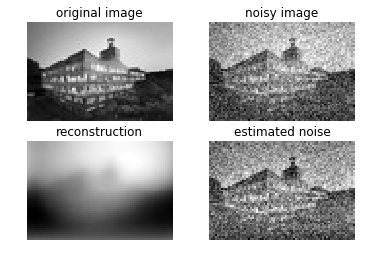

std : 0.4 , lambda :  16 , error :  49.60921929415192


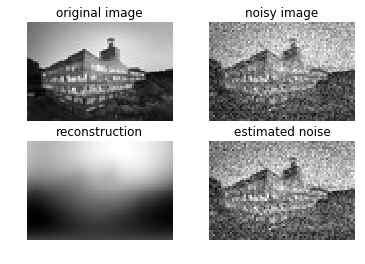

std : 0.6000000000000001 , lambda :  0.03125 , error :  37.236588304516935


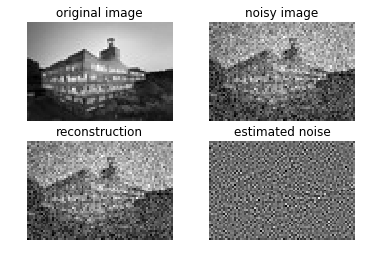

std : 0.6000000000000001 , lambda :  0.0625 , error :  36.906412667762524


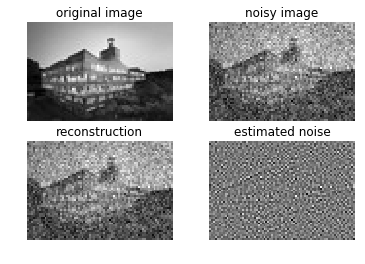

std : 0.6000000000000001 , lambda :  0.125 , error :  34.46253393629226


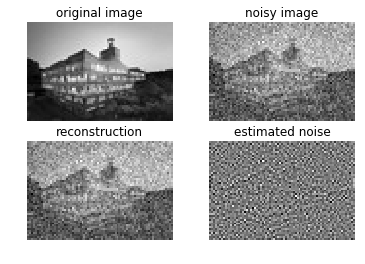

std : 0.6000000000000001 , lambda :  0.25 , error :  30.508063457975517


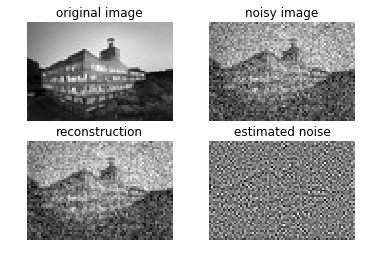

std : 0.6000000000000001 , lambda :  0.5 , error :  21.86172541464318


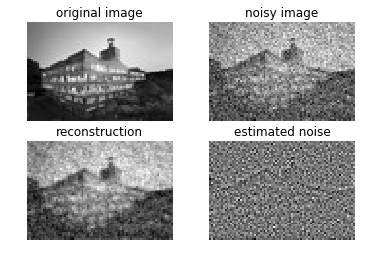

std : 0.6000000000000001 , lambda :  1 , error :  17.73454157872584


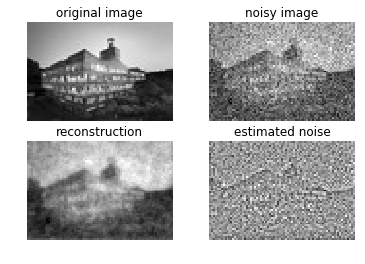

std : 0.6000000000000001 , lambda :  2 , error :  22.469289696045482


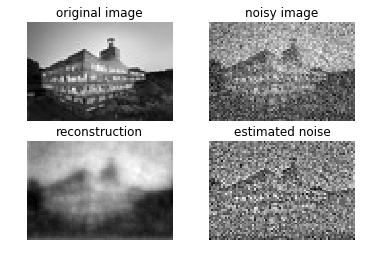

std : 0.6000000000000001 , lambda :  4 , error :  29.987662559412158


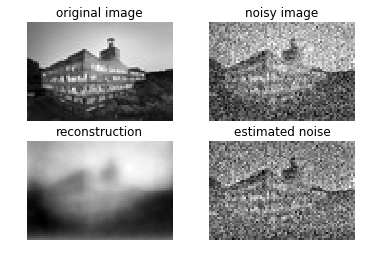

std : 0.6000000000000001 , lambda :  8 , error :  39.413722361125295


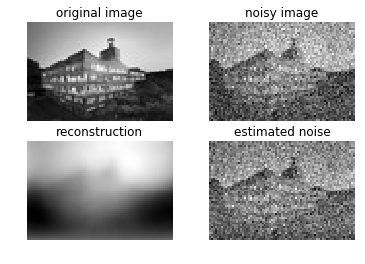

std : 0.6000000000000001 , lambda :  16 , error :  49.55045005991019


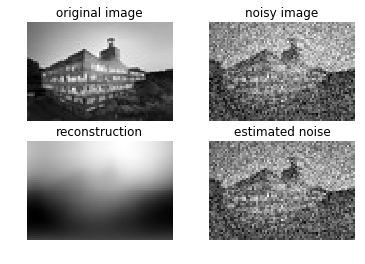

std : 0.8 , lambda :  0.03125 , error :  50.01376445984276


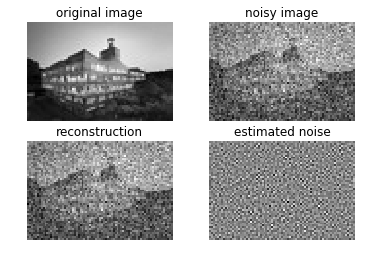

std : 0.8 , lambda :  0.0625 , error :  48.77414942339316


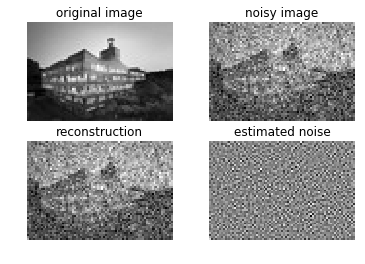

std : 0.8 , lambda :  0.125 , error :  46.61026299589105


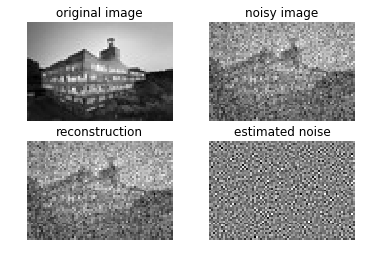

std : 0.8 , lambda :  0.25 , error :  40.06852912265865


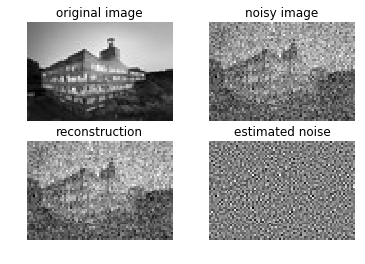

std : 0.8 , lambda :  0.5 , error :  28.643516968885027


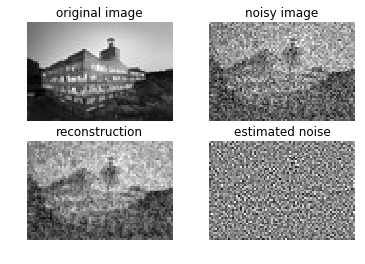

std : 0.8 , lambda :  1 , error :  20.77359805814788


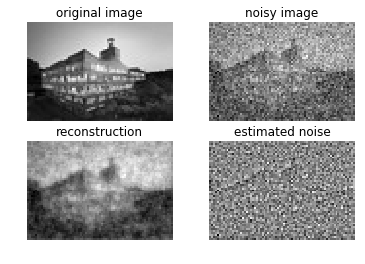

std : 0.8 , lambda :  2 , error :  22.7972778082048


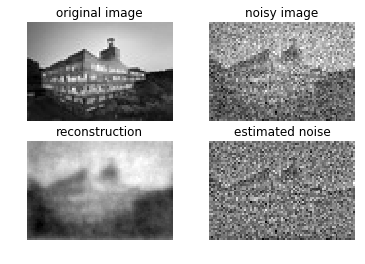

std : 0.8 , lambda :  4 , error :  29.756102385766955


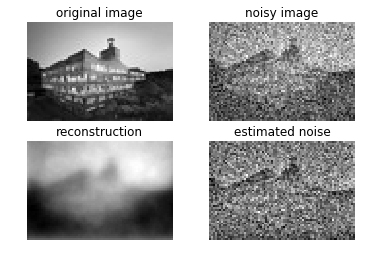

std : 0.8 , lambda :  8 , error :  39.597157050294406


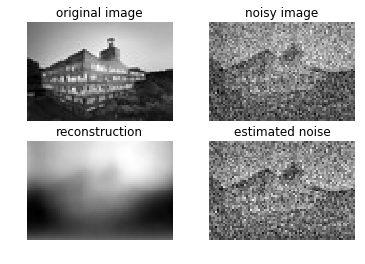

std : 0.8 , lambda :  16 , error :  49.660738914952674


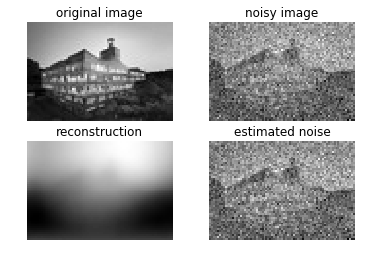

In [22]:
for i in range(1,5):
    for j in range(-5,5):
        
        noise_std   = 0.2 * i # noise standard deviation
        noise       = np.random.normal(0, noise_std, (row, col))
        im_noise    = im + noise
        u_gradient_vector = im_noise.reshape(-1)
        identity_matrix = np.identity(row*col)
        lambda_val = 2**j # Present the reconstruction image with varying regularization parameter
        x_derivative_val = lambda_val * x_derivative(row, col)
        y_derivative_val = lambda_val * y_derivative(row, col)
        f = im_noise.reshape(-1) #f is image with noise plus original data 
        zero_matrix = np.zeros((row*col))
        A = np.concatenate((identity_matrix ,x_derivative_val, y_derivative_val), axis = 0)
        B = np.concatenate((f, zero_matrix, zero_matrix), axis = 0)
        u = np.dot(np.dot(lin.inv(np.dot(A.T, A)), A.T), B) #u is unknown
        u = u.reshape(row,col)
        
        im_recon    = u # Present the reconstruction error
        noise_recon = im_noise - im_recon
        error       = np.linalg.norm(im - im_recon)

        print('std :',noise_std,', lambda : ',lambda_val,', error : ', error)
        p1 = plt.subplot(2,2,1)
        p1.set_title('original image')
        plt.imshow(im_gray, cmap='gray') #im
        plt.axis('off')
      
        p2 = plt.subplot(2,2,2)
        p2.set_title('noisy image')
        plt.imshow(im_noise, cmap='gray')
        plt.axis('off')
        
        p3 = plt.subplot(2,2,3)
        p3.set_title('reconstruction')
        plt.imshow(u, cmap='gray') #im_recon
        plt.axis('off')
      
        p4 = plt.subplot(2,2,4)
        p4.set_title('estimated noise')
        plt.imshow(noise_recon, cmap='gray')
        plt.axis('off')
        plt.show()